Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


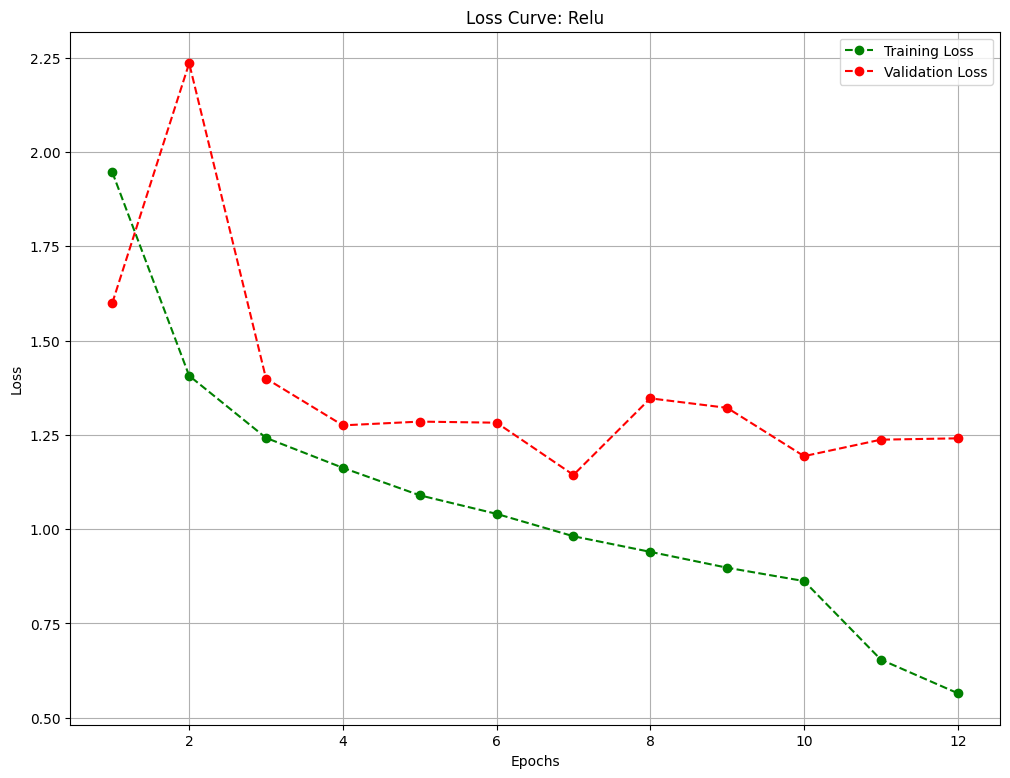

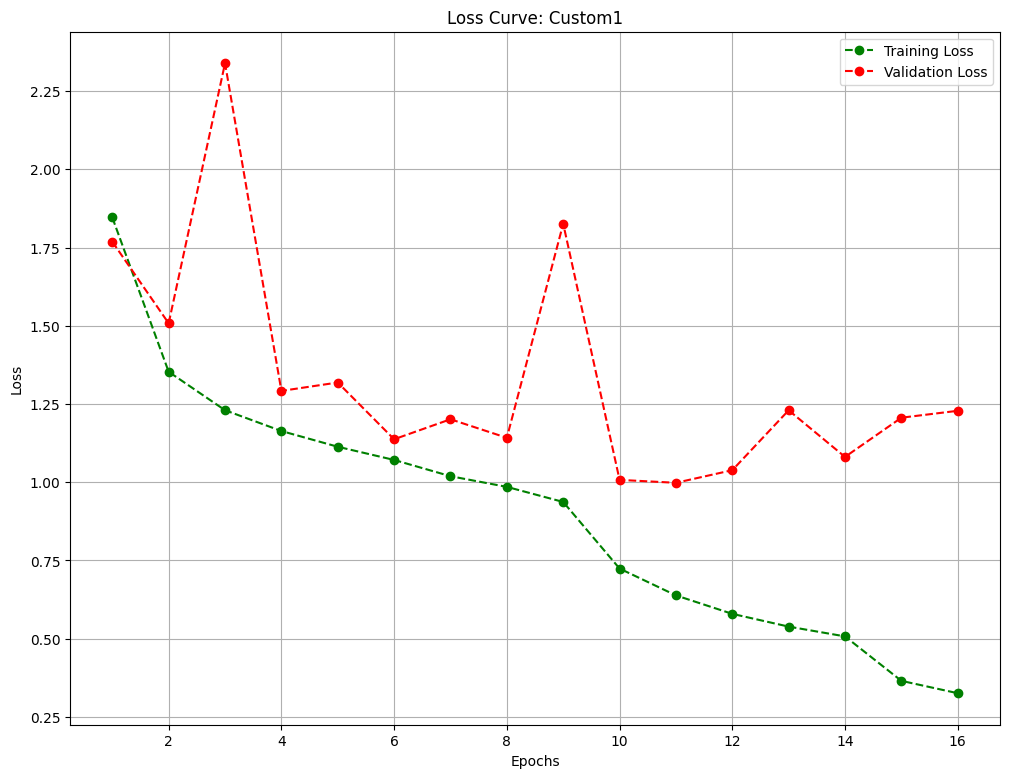

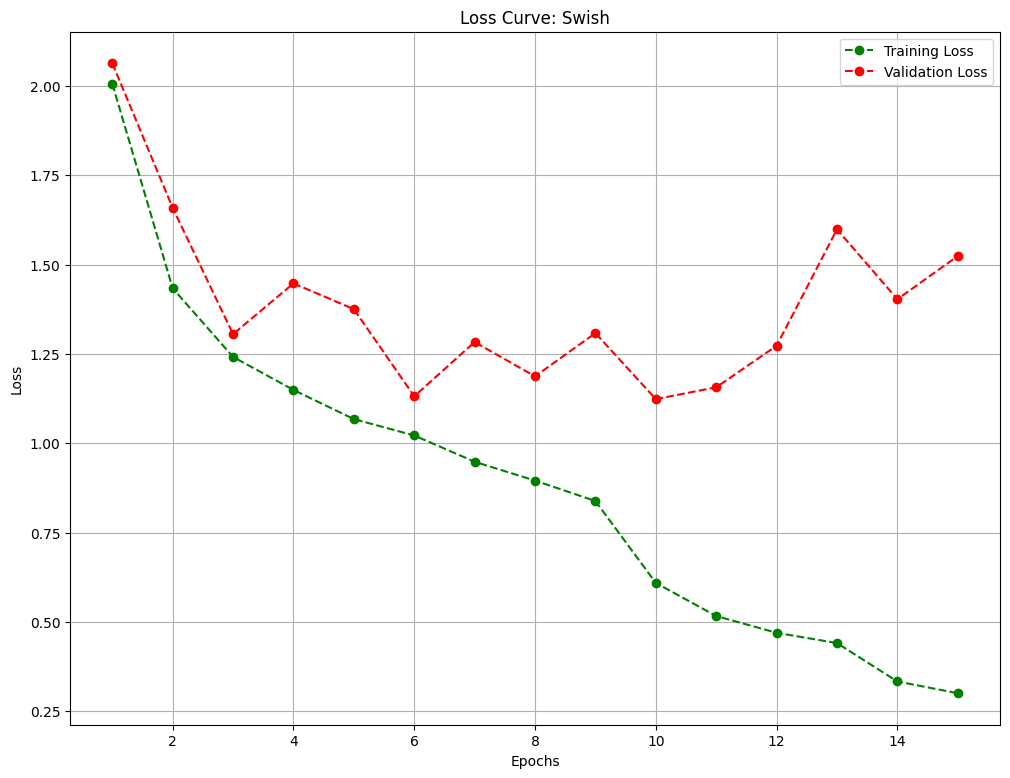

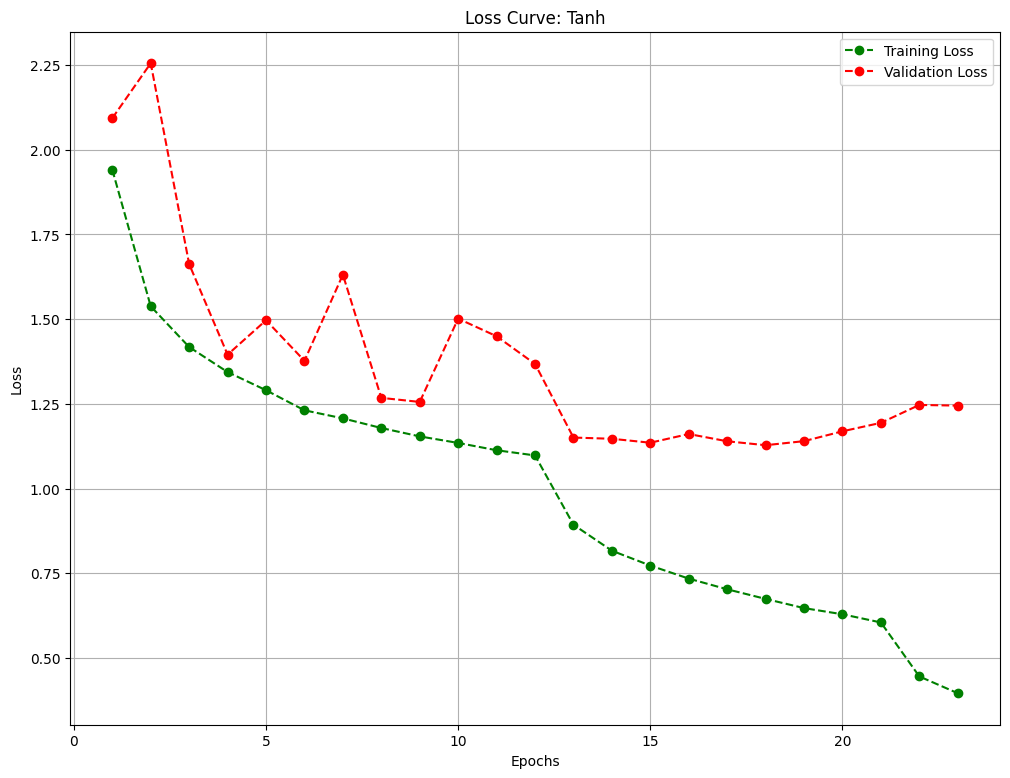

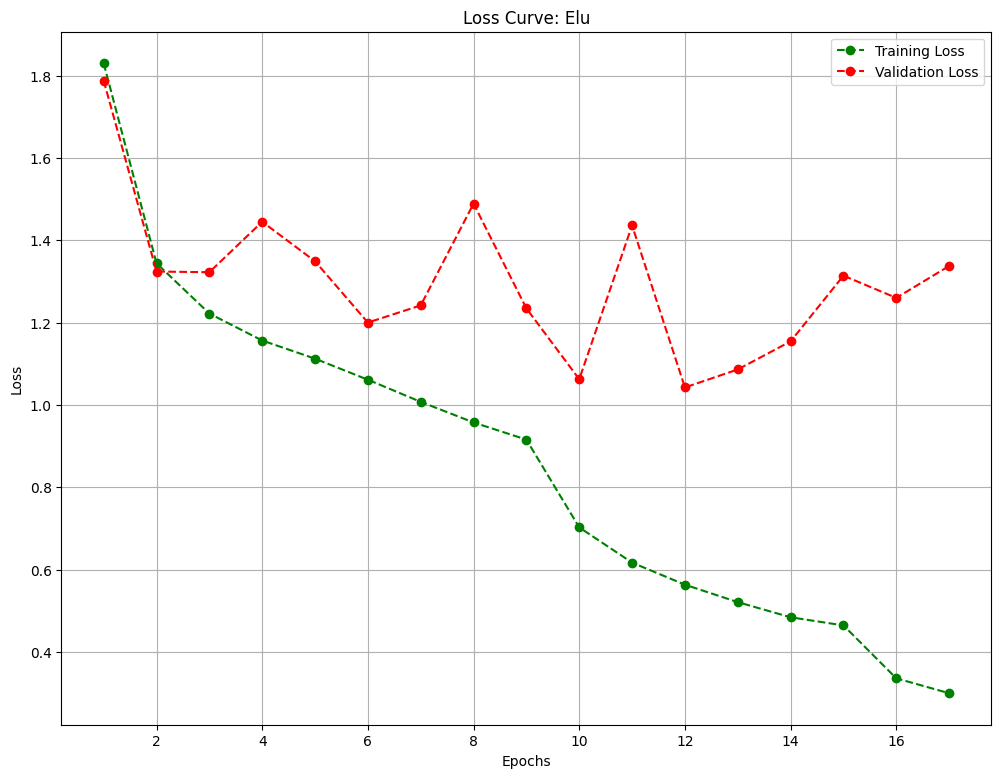

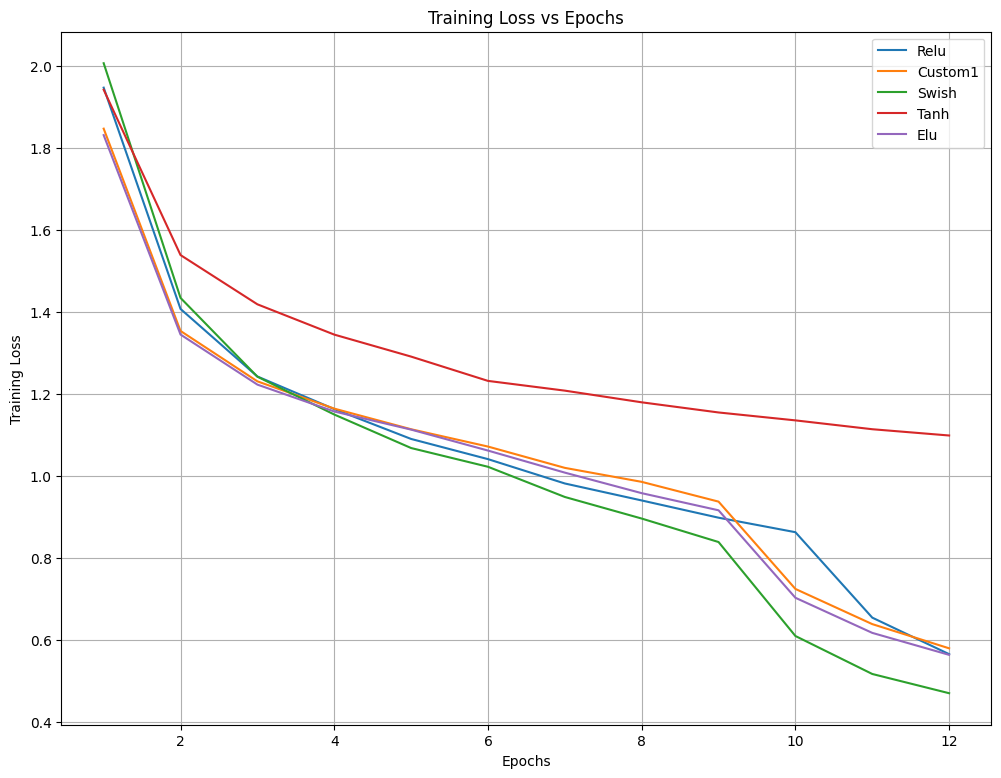

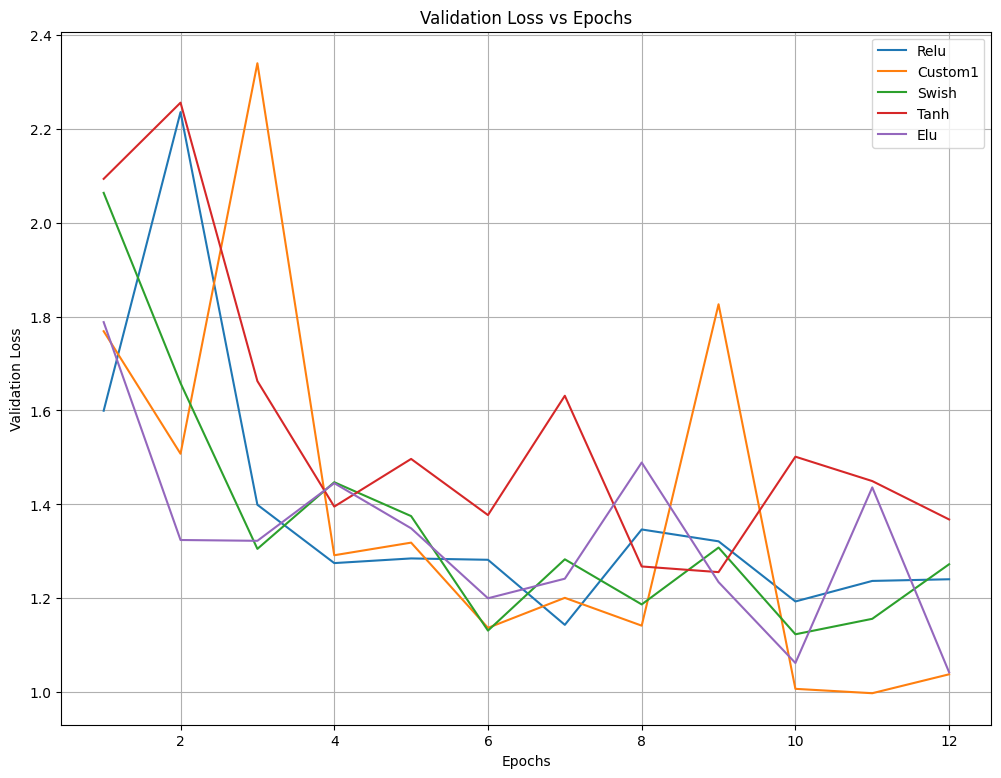

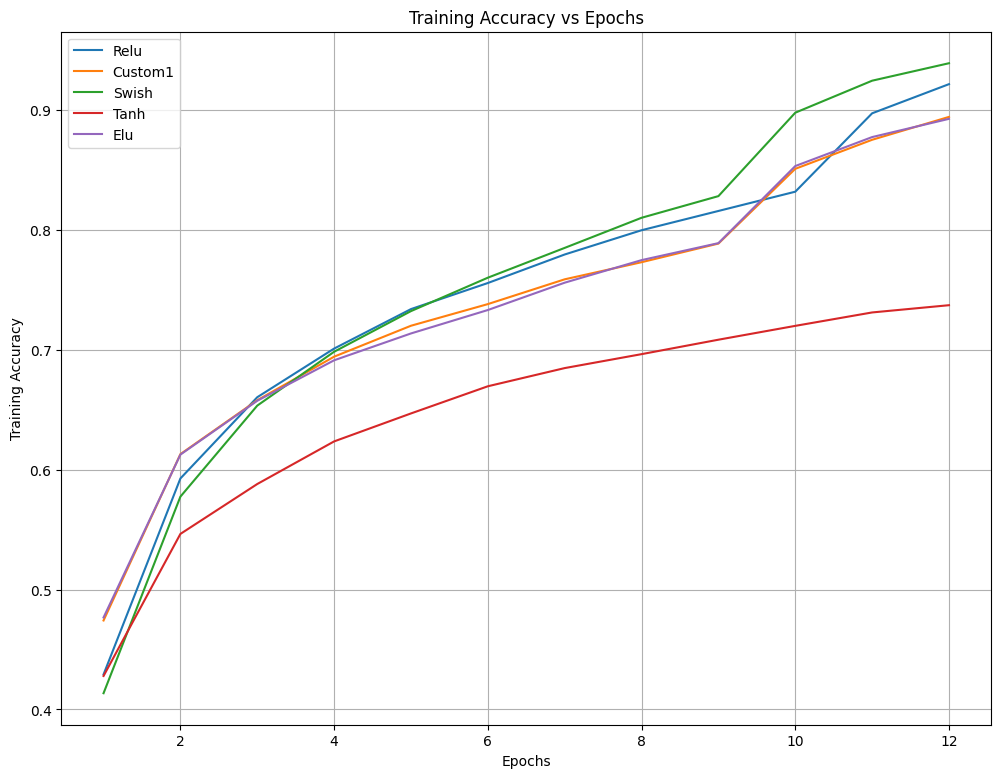

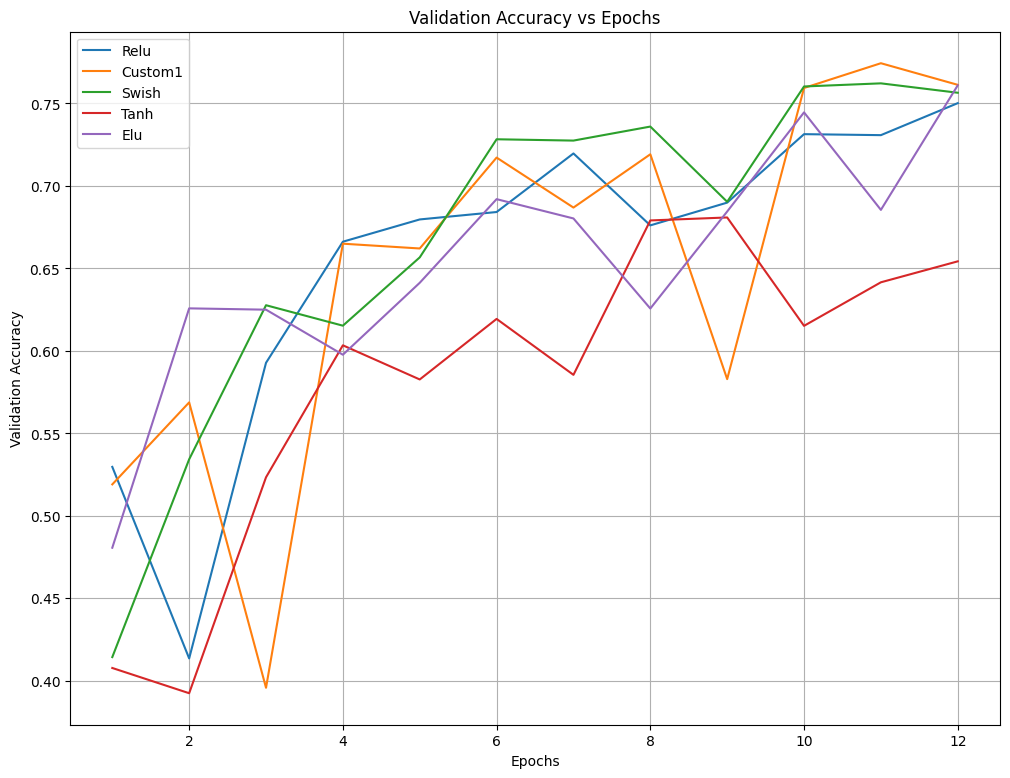


📊 Sorted Performance Metrics:

         Precision  Recall  F1 Score  Test Acc.
Custom1      0.779   0.774     0.773      0.774
Elu          0.770   0.761     0.763      0.761
Swish        0.768   0.760     0.759      0.760
Tanh         0.747   0.732     0.735      0.732
Relu         0.744   0.720     0.724      0.720


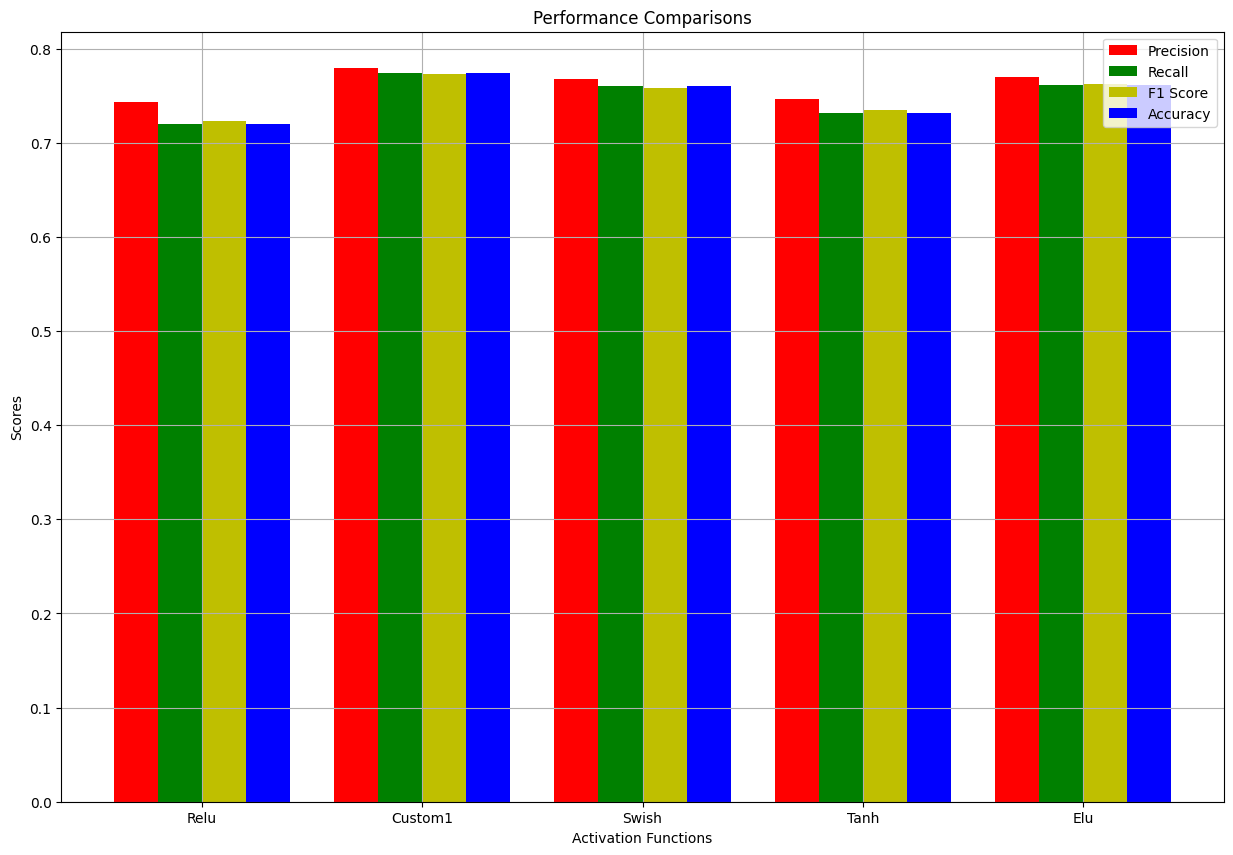

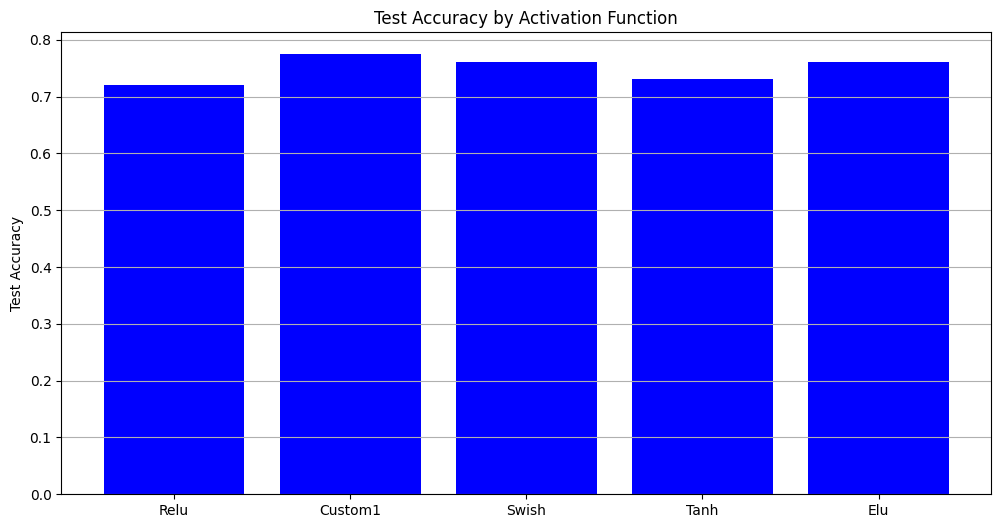

In [9]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

# 📁 Mount Google Drive
drive.mount('/content/drive')

# 🔄 Load JSON result files
paths = {
    "Relu": '/content/drive/My Drive/Colab Notebooks/relu_performance.json',
    "Custom1": '/content/drive/My Drive/Colab Notebooks/custom1_performance.json',
    "Swish": '/content/drive/My Drive/Colab Notebooks/swish_performance.json',
    "Tanh": '/content/drive/My Drive/Colab Notebooks/tanh_performance.json',
    "Elu": '/content/drive/My Drive/Colab Notebooks/elu_performance.json',
}
results = {}
for name, path in paths.items():
    with open(path, 'r') as f:
        results[name] = json.load(f)

# ✅ Helper to plot with dynamic x-axis
def plot_loss_curves(name, metrics_dict):
    epochs = range(1, len(metrics_dict['loss_train']) + 1)
    plt.figure(figsize=(12, 9))
    plt.plot(epochs, metrics_dict['loss_train'], "go--", label="Training Loss")
    plt.plot(epochs, metrics_dict['loss_val'], "ro--", label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# ✅ Plot individual loss curves
for name, data in results.items():
    plot_loss_curves(name, data)

# ✅ Combined Training Loss Plot (aligned by min length)
min_epochs = min(len(v['loss_train']) for v in results.values())
plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['loss_train'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Combined Validation Loss Plot
plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['loss_val'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Combined Training Accuracy Plot
plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['acc_train'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Combined Validation Accuracy Plot
plt.figure(figsize=(12, 9))
for name, data in results.items():
    plt.plot(range(1, min_epochs+1), data['acc_val'][:min_epochs], label=name)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Collect PRF and Final Accuracy
index = list(results.keys())
columns = {0: "Precision", 1: "Recall", 2: "F1 Score"}

list_of_scores = [results[model]['prf_score'] for model in index]
test_accuracy = pd.Series(
    [results[model]['score'][1] for model in index],
    name="Test Acc.",
)

df1 = pd.concat([pd.DataFrame(list_of_scores).drop(columns=[3]), test_accuracy], axis=1)
df1.columns = ["Precision", "Recall", "F1 Score", "Test Acc."]
df1.index = index
df1_sorted = df1.sort_values(by="Test Acc.", ascending=False)

print("\n📊 Sorted Performance Metrics:\n")
print(round(df1_sorted, 3))

# ✅ Bar Chart for Metrics
precisions = [score[0] for score in list_of_scores]
recalls = [score[1] for score in list_of_scores]
f1_scores = [score[2] for score in list_of_scores]

width = 0.2
x = np.arange(len(index))
plt.figure(figsize=(15, 10))
plt.bar(x - 1.5 * width, precisions, width=width, color="r", label="Precision")
plt.bar(x - 0.5 * width, recalls, width=width, color="g", label="Recall")
plt.bar(x + 0.5 * width, f1_scores, width=width, color="y", label="F1 Score")
plt.bar(x + 1.5 * width, test_accuracy, width=width, color="b", label="Accuracy")
plt.xticks(ticks=x, labels=index)
plt.xlabel("Activation Functions")
plt.ylabel("Scores")
plt.title("Performance Comparisons")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Accuracy Only Chart
plt.figure(figsize=(12, 6))
plt.bar(index, test_accuracy, color="b")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy by Activation Function")
plt.grid(axis="y")
plt.show()